In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
!pip install tensorflow-gpu==2.12.0


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Checking missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

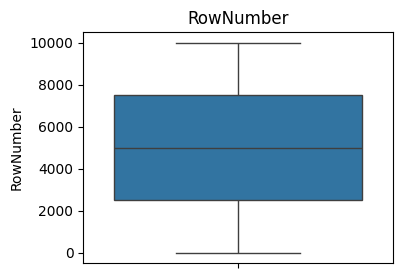

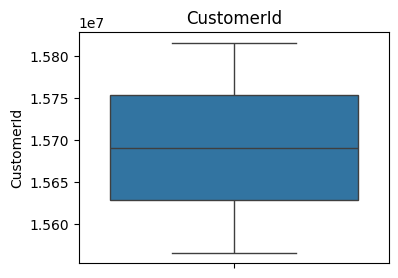

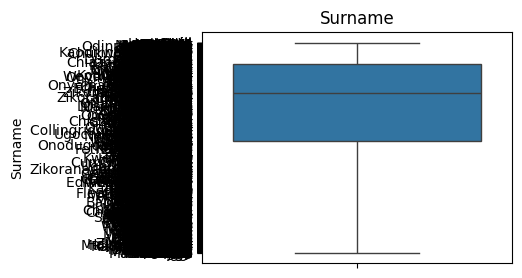

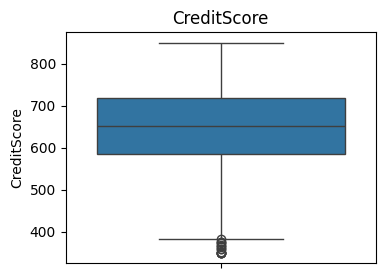

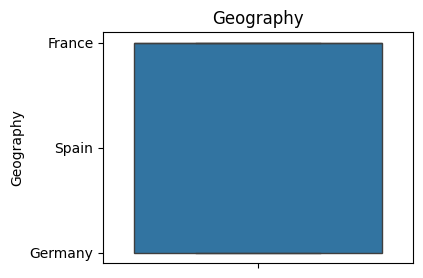

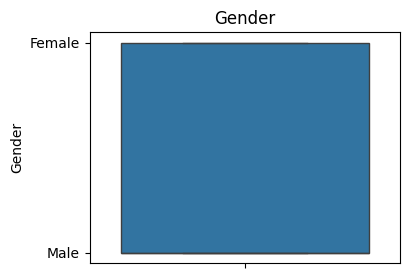

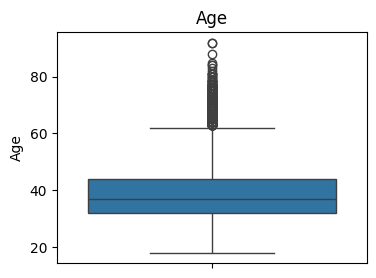

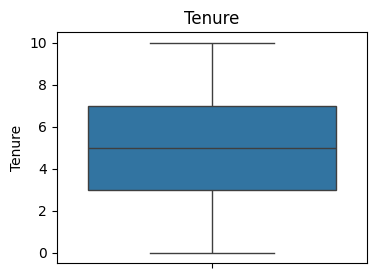

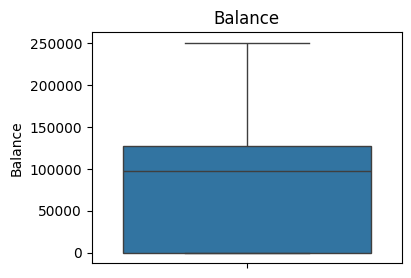

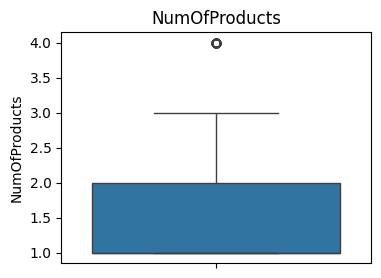

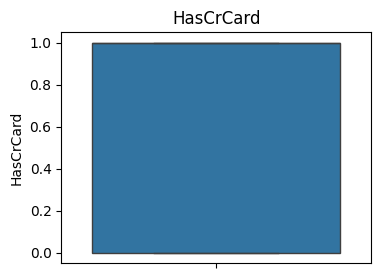

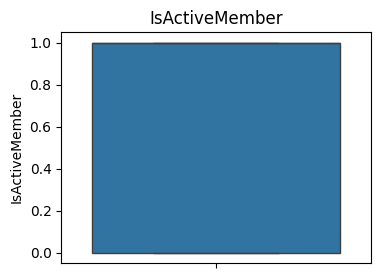

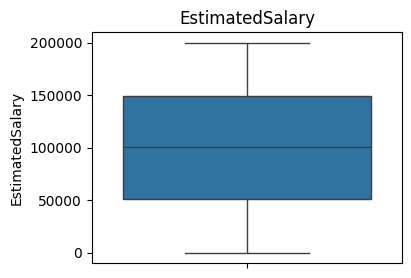

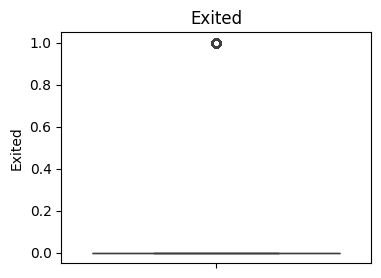

In [ ]:
#Checking outliers
for i in df.columns:
  plt.figure(figsize = (4,3))
  sns.boxplot(df[i])
  plt.title(i)

In [ ]:
#Checking whether the target variable is balanaced or not
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

As we can see the data is heavily imbalanced.

In [ ]:
#One-hot encoding on categorical columns
geography = pd.get_dummies(df['Geography'] , drop_first = True)
gender = pd.get_dummies(df['Gender'] , drop_first = True)

In [ ]:
#We are getting output in boolean instead of 0 and 1 so we will be converting the variable to int format
geography = geography.astype(int)
gender = gender.astype(int)

In [ ]:
#Remove the original variable like geography and gender columns and then concatenate it by one-hot encoding variables
df.drop(['Geography' , 'Gender'] , axis = 1 , inplace = True)



In [ ]:
#concatenating the geograoghy and gender variable with the original dataframe
df = pd.concat([df , geography , gender] , axis = 1)

In [ ]:
#Removing unwanted continous columns like RowNumber , CustomerId , Surname which are not important for my predictions
df.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [ ]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [ ]:
x = df.drop('Exited' , axis = 1)
y = df.loc[: , 'Exited'].values

In [ ]:
#splitting the dataset in training and testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

In [ ]:
#Scaling the models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Balancing the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_smote , y_smote = sm.fit_resample(x_train , y_train)

In [ ]:
pd.Series(y_smote).value_counts()

1    5547
0    5547
Name: count, dtype: int64

Now the data is balanced and cleaned

Model Building [Tensorflow]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU
from tensorflow.keras.layers import Dropout


model = Sequential()

#adding input layers [we have 11 columns in total we will be using 11 input layers]
model.add(Dense(units = 11 , activation = 'relu'))

#adding 1st hidden layers
model.add(Dense(units = 6 , activation = 'relu'))

#adding 2nd hidden layers
model.add(Dense(units = 7 , activation = 'relu'))

#adding output layer
model.add(Dense(1 , activation = 'sigmoid'))

#Compiling all the layers
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

#Fit the model
model_history = model.fit(x_smote , y_smote , validation_split = 0.33 , batch_size = 10 , epochs = 1000 , callbacks = early_stopping)


Epoch 1/1000
744/744 [==============================] - 5s 5ms/step - loss: 0.5154 - accuracy: 0.7487 - val_loss: 1.0922 - val_accuracy: 0.1428
Epoch 2/1000
744/744 [==============================] - 2s 2ms/step - loss: 0.4724 - accuracy: 0.7815 - val_loss: 1.0471 - val_accuracy: 0.3842
Epoch 3/1000
744/744 [==============================] - 2s 3ms/step - loss: 0.4472 - accuracy: 0.8036 - val_loss: 0.9016 - val_accuracy: 0.4866
Epoch 4/1000
744/744 [==============================] - 2s 2ms/step - loss: 0.4222 - accuracy: 0.8155 - val_loss: 0.8215 - val_accuracy: 0.5445
Epoch 5/1000
744/744 [==============================] - 2s 3ms/step - loss: 0.4025 - accuracy: 0.8241 - val_loss: 0.9420 - val_accuracy: 0.4975
Epoch 6/1000
744/744 [==============================] - 2s 3ms/step - loss: 0.3899 - accuracy: 0.8313 - val_loss: 0.8333 - val_accuracy: 0.5538
Epoch 7/1000
744/744 [==============================] - 3s 4ms/step - loss: 0.3823 - accuracy: 0.8342 - val_loss: 0.9003 - val_accuracy:

In [ ]:
#predicting the train set result
y_pred_train = model.predict(x_train)
y_pred_train = (y_pred_train>=0.5)

#predicting the test set result
y_pred_test = model.predict(x_test)
y_pred_test = (y_pred_test>=0.5)

#Checking accuracy of traung and test set
accuracy_train = accuracy_score(y_train , y_pred_train)
print(f"The accuracy score of traing set is : {accuracy_train}")

accuracy_test = accuracy_score(y_test , y_pred_test)
print(f"the accuracy score of the test set is : {accuracy_test}")

#classfication report
classification = classification_report(y_test , y_pred_test)
print(classification)

94/94 [==============================] - 0s 1ms/step
The accuracy score of traing set is : 0.8602857142857143
the accuracy score of the test set is : 0.8586666666666667
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2416
           1       0.67      0.54      0.60       584

    accuracy                           0.86      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000

